## BTG Intro to Data Science 
February 11, 2019

## Dataset
Celebrity Face Attributes Dataset

https://www.kaggle.com/jessicali9530/celeba-dataset

## Column Metadata
image_id
5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young

## Project Code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import collections
from IPython.display import Image

%matplotlib inline

In [63]:
# Importing Celebrity Attributes Table

# defining column names 
app_cols = ['image_id','5_o_Clock_Shadow','Arched_Eyebrows','Bags_Under_Eyes','Bald','Bangs','Big_Lips',
            'Big_Nose','Black_Hair','Blond_Hair','Blurry','Brown_Hair','Bushy_Eyebrows','Double_Chin',
            'Eyeglasses','Goatee','Gray_Hair']

# reading in specific columns of csv file 
col_numbers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18]
pre_attr = pd.read_csv('list_attr_celeba.csv', dtype=object, usecols=col_numbers, 
                     encoding='latin-1')

# display first 5 rows
print(len(pre_attr), "rows")
print(len(pre_attr.columns), "columns")
pre_attr.head(5)

202599 rows
18 columns


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Double_Chin,Eyeglasses,Goatee,Gray_Hair
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## Cleaning the Data

In [64]:
# deleting rows that are not needed
pre_attr  = pre_attr.drop(0)

# deleting columns that are not needed
pre_attr = pre_attr.drop('image_id', axis=1)
pre_attr = pre_attr.drop('Attractive', axis=1)

pre_attr.head(5)

,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Double_Chin,Eyeglasses,Goatee,Gray_Hair
1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1


In [65]:
# # Code columns into boolean value
def make_bool(x):
    if(int(x) in [-1,0]):
        return 0
    elif(int(x) == 1):
        return 1

pre_attr.head(10)

# apply function to every column
for column in list(pre_attr):
    pre_attr[column] = pre_attr[column].apply( lambda x: make_bool(x))
    
pre_attr.head(10)

attr = pre_attr.copy(deep=True)

{'5_o_Clock_Shadow': 22516, 'Arched_Eyebrows': 54089, 'Bags_Under_Eyes': 41446, 'Bald': 4547, 'Bangs': 30709, 'Big_Lips': 48785, 'Big_Nose': 47516, 'Black_Hair': 48472, 'Blond_Hair': 29983, 'Blurry': 10312, 'Brown_Hair': 41571, 'Bushy_Eyebrows': 28803, 'Double_Chin': 9459, 'Eyeglasses': 13193, 'Goatee': 12716, 'Gray_Hair': 8499} 



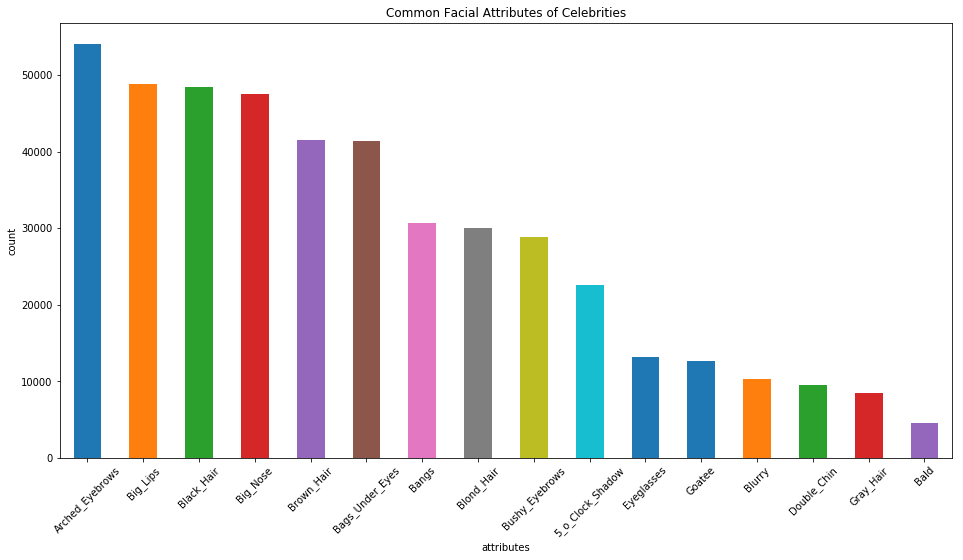

In [86]:
#### ANALYZING THE DATA 

import collections
##### Common Attributes

# find the total number of times an attribute is present, for every attribute
attr_dict = {}
for col in list(attr):
    col_data = attr[col]
    num_instances = sum(col_data) 
    attr_dict[col] = num_instances
    
print(attr_dict, "\n")

# sort attributes by total instances, descending order
attr_freq = sorted(attr_dict.items(), key=lambda kv: kv[1], reverse=True)
attr_names = [a[0] for a in attr_freq] 
attr_nums = [a[1] for a in attr_freq]

# call matplotlib to plot a bar chart
common_attr_plt = pd.Series(attr_nums, index=attr_names)
b = common_attr_plt.plot(kind='bar', figsize=[16,8], rot=45)
b.set_ylabel("count")
b.set_xlabel("attributes")
b.set_title("Common Facial Attributes of Celebrities")
plt.show()


## Visualization

In [87]:
#get training and testing rows
train_events = attr[:40000]
test_events = attr[40000:]
X = [[row['5_o_Clock_Shadow'], row['Black_Hair'], row['Goatee']] for index, row in train_events.iterrows()]
y = train_events['Bald']

X_test = [[row['5_o_Clock_Shadow'], row['Black_Hair'], row['Goatee']] for index, row in test_events.iterrows()]
y_test = test_events['Bald']

print(y_test[:10])

40001    0
40002    0
40003    0
40004    0
40005    0
40006    0
40007    0
40008    0
40009    0
40010    0
Name: Bald, dtype: int64


In [88]:
#convert series to lists
y_train = y.tolist()
y_test = y_test.tolist()
#convert lists to numpy arrays
y_train_np = np.array(y)
X_train_np = np.array(X, dtype = 'float32')
y_test_np = np.array(y_test)
X_test_np = np.array(X_test, dtype = 'float32')
print(X_train_np)
print(X_test_np)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [89]:
#choose model
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
#comment out models unused, uncomment model to be used
#model = GaussianNB()
#model = MultinomialNB()
#model = svm.SVC()
model = svm.LinearSVC()
#model = BernoulliNB()

In [90]:
#fit and test model
from sklearn.metrics import accuracy_score 

model.fit(X_train_np, y_train_np)
pred = model.predict(X_test_np)
accuracy_score(y_test_np, pred)

0.9776196509182155